## Analyzing the data

First, we need to import required packages and datasets:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trips_mar2024_feb2025 = pd.read_csv(r"annual_divvy_trips\annual_trips\annual_trips_mar2024_feb2025_v02.csv")

In [3]:
trips_mar2024_feb2025.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,391B0EFEC1CE3771,electric_bike,2024-03-09 17:36:21,2024-03-09 17:36:45,Morgan Ave & 14th Pl,TA1306000002,Morgan Ave & 14th Pl,TA1306000002,41.862417,-87.651088,41.862378,-87.651062,member,0 days 00:00:24,6
1,44E934751422D15C,classic_bike,2024-03-21 18:40:56,2024-03-21 18:42:14,Campbell Ave & Montrose Ave,15623,Campbell Ave & Montrose Ave,15623,41.961524,-87.691177,41.961524,-87.691177,member,0 days 00:01:18,4
2,B725414CC16E5744,classic_bike,2024-03-02 09:16:18,2024-03-02 09:25:17,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,member,0 days 00:08:59,6
3,76B839D9F5347C44,classic_bike,2024-03-10 13:58:34,2024-03-10 14:29:33,Cottage Grove Ave & 51st St,TA1309000067,Cottage Grove Ave & 51st St,TA1309000067,41.803038,-87.606615,41.803038,-87.606615,member,0 days 00:30:59,7
4,00C4D395FD14750F,classic_bike,2024-03-29 14:19:57,2024-03-29 14:46:08,Cottage Grove Ave & 51st St,TA1309000067,Cottage Grove Ave & 51st St,TA1309000067,41.803038,-87.606615,41.803038,-87.606615,member,0 days 00:26:11,5


In [4]:
trips_mar2024_feb2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049271 entries, 0 to 4049270
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  ride_length         object 
 14  day_of_week         int64  
dtypes: float64(4), int64(1), object(10)
memory usage: 463.4+ MB


In [5]:
# Correct the field types to improve consistency, reduce file size and fast processing
trips_mar2024_feb2025["started_at"] = trips_mar2024_feb2025["started_at"].astype("datetime64[ns]")
trips_mar2024_feb2025["ended_at"] = trips_mar2024_feb2025["ended_at"].astype("datetime64[ns]")
trips_mar2024_feb2025["ride_length"] = trips_mar2024_feb2025["ride_length"].astype("timedelta64[s]")
trips_mar2024_feb2025["day_of_week"] = trips_mar2024_feb2025["day_of_week"].astype(np.int8)
trips_mar2024_feb2025.set_index("ride_id", inplace = True)

In [6]:
trips_mar2024_feb2025.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4049271 entries, 391B0EFEC1CE3771 to 91C4E635C5285CE1
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   rideable_type       object        
 1   started_at          datetime64[ns]
 2   ended_at            datetime64[ns]
 3   start_station_name  object        
 4   start_station_id    object        
 5   end_station_name    object        
 6   end_station_id      object        
 7   start_lat           float64       
 8   start_lng           float64       
 9   end_lat             float64       
 10  end_lng             float64       
 11  member_casual       object        
 12  ride_length         timedelta64[s]
 13  day_of_week         int8          
dtypes: datetime64[ns](2), float64(4), int8(1), object(6), timedelta64[s](1)
memory usage: 436.4+ MB


In [7]:
# We start with descriptive analysis, use .agg() to calculate multiple statistics at once
result = trips_mar2024_feb2025.agg({'ride_length': ['mean', 'max'], 'day_of_week': 'mode'})

# Flatten the index
result.columns = ["ride_length", "day_of_week"]
result.reset_index(drop=True, inplace=True)  # Remove the index if not needed
result["function"] = ["mean", "max", "mode"]
result.set_index("function", inplace = True)
result

,ride_length,day_of_week
function,,
mean,0 days 00:16:24,NaN
max,1 days 01:09:22,NaN
mode,NaT,6.0


## Business Task: How annual members and casual riders use Cyclistic bikes differently?
### Step 1: Calculate the average ride_length for members and casual riders.

In [8]:
ride_length_dif = trips_mar2024_feb2025.pivot_table(values = "ride_length", index = "member_casual",
                                                   aggfunc = "mean")
ride_length_dif

,ride_length
member_casual,
casual,0 days 00:23:41
member,0 days 00:12:17


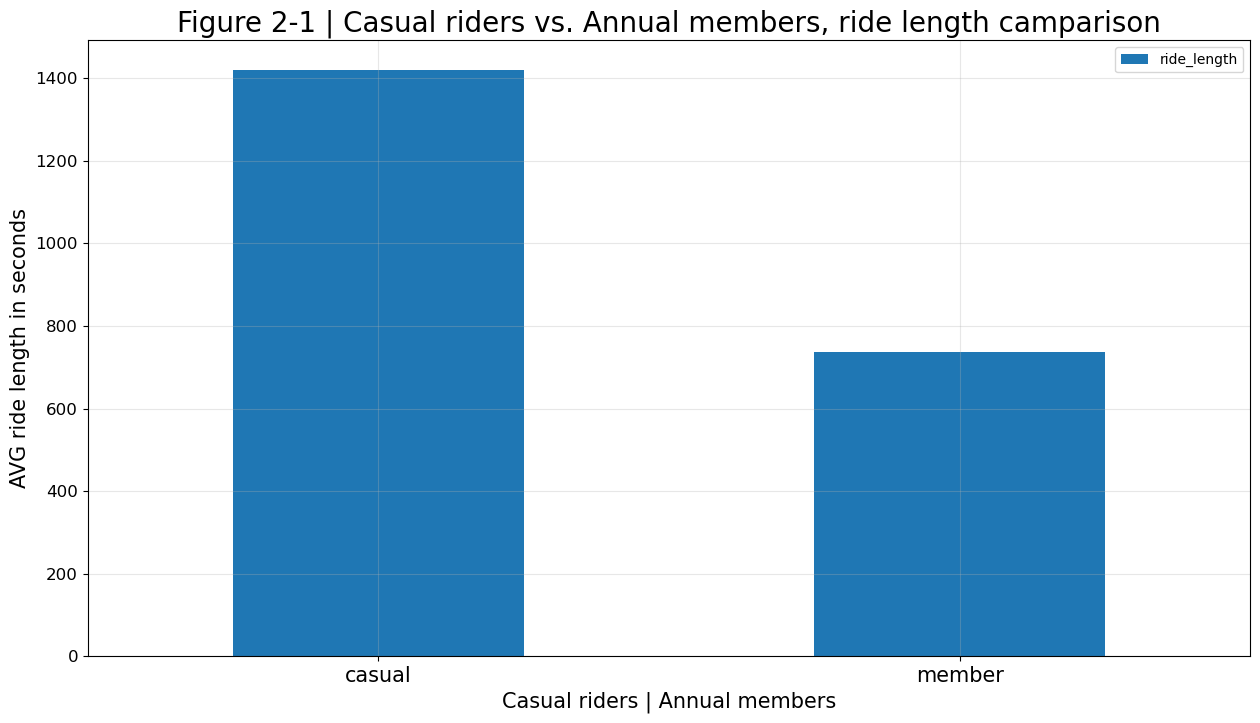

fig 2-1 | On average, casual riders take nearly twice as long as annual members per ride, averaging 23:41 min, 
while members complete their rides in 12:17 min.


In [9]:
# Highlighting the difference of casual riders and members in ride length on average-
# -using visualization
ride_length_dif.plot(figsize = (15, 8), kind = 'bar')
plt.xticks(fontsize = 15, rotation = 0)
plt.yticks(fontsize = 12)
plt.title("Figure 2-1 | Casual riders vs. Annual members, ride length camparison", fontsize = 20)
plt.xlabel("Casual riders | Annual members", fontsize = 15)
plt.ylabel("AVG ride length in seconds", fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()
print("fig 2-1 | On average, casual riders take nearly twice as long as annual members per ride, averaging 23:41 min, \nwhile members complete their rides in 12:17 min.")

### Step 2: Calculate the average ride_length for users by day_of_week.

In [10]:
# Converting day_of_week numbers to actual names
day_mapping = {
    1: "Sunday",
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
    7: "Saturday"
}
trips_mar2024_feb2025["day_of_week"] = trips_mar2024_feb2025["day_of_week"].map(day_mapping)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
trips_mar2024_feb2025["day_of_week"] = pd.Categorical(
    trips_mar2024_feb2025["day_of_week"], 
    categories=day_order, 
    ordered=True
)

In [11]:
ride_len_per_day = trips_mar2024_feb2025.pivot_table(values = 'ride_length', index = 'member_casual',
                                                     columns = 'day_of_week', aggfunc = 'mean', observed = False)
# Making sure we have columns in order
ride_len_per_day

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
member_casual,,,,,,,
casual,0 days 00:20:12,0 days 00:21:03,0 days 00:20:40,0 days 00:22:49,0 days 00:26:53,0 days 00:27:16,0 days 00:22:48
member,0 days 00:11:44,0 days 00:11:56,0 days 00:11:46,0 days 00:11:57,0 days 00:13:47,0 days 00:13:48,0 days 00:11:42


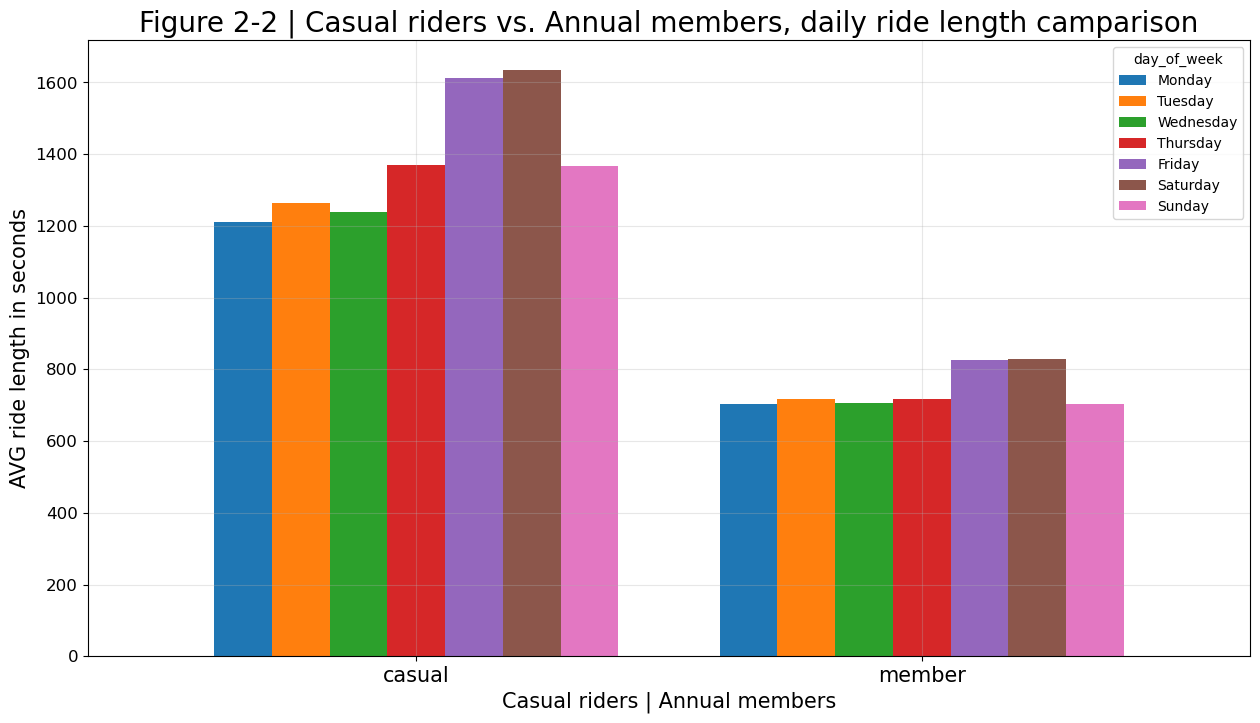

fig 2-2 | On average, casual riders take nearly twice as long as annual members per day, 
but both categories are nearly in their maximum in Fridays and Saturdays.


In [18]:
ride_len_per_day.plot(figsize = (15, 8), kind = "bar", width = 0.8)
plt.xticks(fontsize = 15, rotation = 0)
plt.yticks(fontsize = 12)
plt.title("Figure 2-2 | Casual riders vs. Annual members, daily ride length camparison", fontsize = 20)
plt.xlabel("Casual riders | Annual members", fontsize = 15)
plt.ylabel("AVG ride length in seconds", fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()
print("fig 2-2 | On average, casual riders take nearly twice as long as annual members per day, \nbut both categories are nearly in their maximum in Fridays and Saturdays.")

### Step 3: Calculate the number of rides for users by day_of_week

In [13]:
# For parsing ride_id as values to pivot table, first we need to reset the index to have ride_id as column
num_of_rides_daily = trips_mar2024_feb2025.reset_index().pivot_table(values = 'ride_id',index = 'member_casual',
                                                                     columns = 'day_of_week', aggfunc = 'count', observed = False)
num_of_rides_daily

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
member_casual,,,,,,,
casual,155149,179727,175161,214826,306760,254972,172890
member,404638,426560,394978,368708,325973,285325,383604


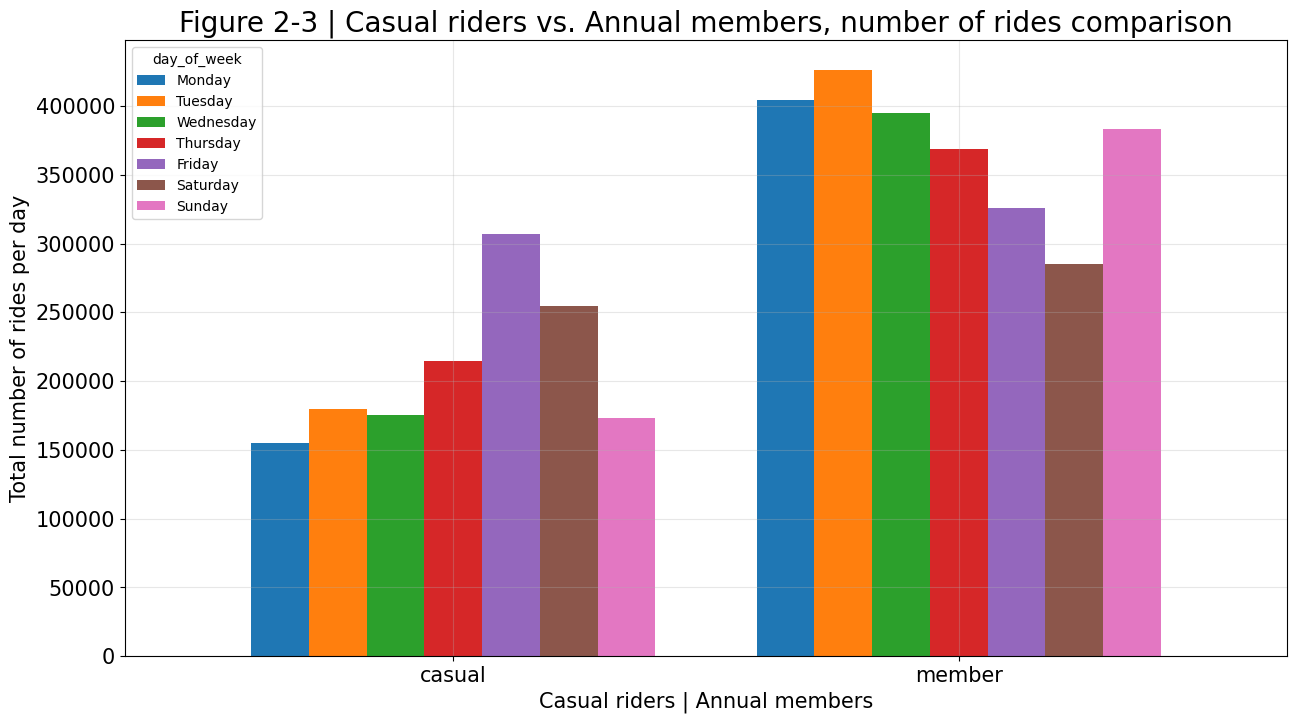

Fig 2-3 | Casual riders take significantly more rides on weekends compared to weekdays, with their peak occurring on Saturdays.
In contrast, annual members have a steadier ride pattern, though they also reach a high on Fridays and Saturdays.


In [14]:
# Plot the pivot table as a bar chart
ax = num_of_rides_daily.plot(figsize=(15, 8), kind='bar', width=0.8)

# Format axes and title
plt.xticks(fontsize=15, rotation = 0)
plt.yticks(fontsize=15)
plt.title("Figure 2-3 | Casual riders vs. Annual members, number of rides comparison", fontsize=20)
plt.xlabel("Casual riders | Annual members", fontsize=15)
plt.ylabel("Total number of rides per day", fontsize=15)
plt.grid(alpha=0.3)
plt.show()

print("Fig 2-3 | Casual riders take significantly more rides on weekends compared to weekdays, with their peak occurring on Saturdays.\nIn contrast, annual members have a steadier ride pattern, though they also reach a high on Fridays and Saturdays.")

### Step 4: Export a summary file for further analysis
We save each pivot table step-by-step, to visualize them using Tableau.
The summaries are stored in summary-tables folder.

In [15]:
num_of_rides_daily.to_csv(r"annual_divvy_trips\annual_trips\summary-tables\num_of_rides_daily.csv")

In [16]:
# To avoid errors, we have to convert datetime to int (seconds)
for col in day_order:
    ride_len_per_day[col] = ride_len_per_day[col].dt.total_seconds()

ride_length_dif["ride_length"] = ride_length_dif["ride_length"].dt.total_seconds()

ride_len_per_day.to_csv(r"annual_divvy_trips\annual_trips\summary-tables\ride_len_per_day.csv")
ride_length_dif.to_csv(r"annual_divvy_trips\annual_trips\summary-tables\ride_length_dif.csv")

## Now, it is time to share our findings!
A PowerPoint named 'cyclistic-trip-insights' has been created for sharing our findings!